In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc

First, we use hierarchical clustering to visualize the correlations between different variables.

In [2]:
heart_data = pd.read_csv('data_cleaned.csv')

In [3]:
heart_data.corr().head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
HeartDisease,1.000000,0.051803,0.107764,-0.032080,0.196835,0.170721,0.028591,0.201258,0.070040,0.233432,0.034854,0.168553,-0.100030,-0.011062,0.008327,0.041444,0.145197,0.093317
BMI,0.051803,1.000000,0.023118,-0.038816,0.019733,0.109788,0.064131,0.181678,0.026940,-0.004744,-0.037424,0.202472,-0.150616,0.035932,-0.051822,0.092345,0.050768,-0.033644
Smoking,0.107764,0.023118,1.000000,0.111768,0.061226,0.115352,0.085157,0.120074,0.085052,0.128331,0.065499,0.053847,-0.097174,0.020625,-0.030336,0.024149,0.034920,0.033977
AlcoholDrinking,-0.032080,-0.038816,0.111768,1.000000,-0.019858,-0.017254,0.051282,-0.035328,0.004200,-0.059528,0.036702,-0.057372,0.017487,0.001629,-0.005065,-0.002202,-0.028280,-0.005702
Stroke,0.196835,0.019733,0.061226,-0.019858,1.000000,0.137014,0.046467,0.174143,-0.003091,0.137822,-0.003956,0.101518,-0.079455,-0.009335,0.011900,0.038866,0.091167,0.048116


In [4]:
heart_data_similar = 1 - heart_data.corr()

/var/folders/gv/wk0j3nmj1j1_b9jt3v5s17lr0000gn/T/ipykernel_974/2831785885.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  hc.dendrogram(hc.linkage(heart_data_similar, method='complete'), labels=(heart_data_similar.columns))


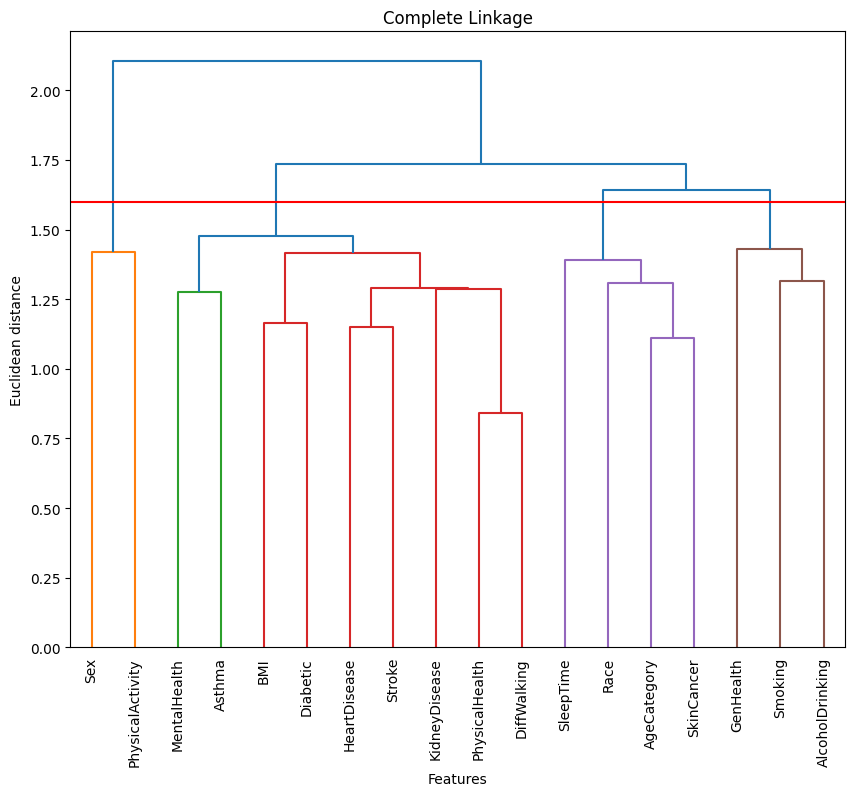

In [5]:
# Create dendrogram
plt.figure(figsize=(10, 8))
hc.dendrogram(hc.linkage(heart_data_similar, method='complete'), labels=(heart_data_similar.columns))
plt.axhline(y=1.6,color='r')
plt.title('Complete Linkage')
plt.xticks(rotation=90,fontsize=10)
plt.xlabel('Features')
plt.ylabel('Euclidean distance')
plt.show()

The red line divide the features into four clusters.

In [6]:
Clustering_result = hc.fcluster(hc.linkage(heart_data_similar,method='complete'),t=4,criterion = 'maxclust')

/var/folders/gv/wk0j3nmj1j1_b9jt3v5s17lr0000gn/T/ipykernel_974/3299541502.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Clustering_result = hc.fcluster(hc.linkage(heart_data_similar,method='complete'),t=4,criterion = 'maxclust')


In [7]:
heart_data_similar[Clustering_result==1].index

Index(['Sex', 'PhysicalActivity'], dtype='object')

In [8]:
heart_data_similar[Clustering_result==2].index

Index(['HeartDisease', 'BMI', 'Stroke', 'PhysicalHealth', 'MentalHealth',
       'DiffWalking', 'Diabetic', 'Asthma', 'KidneyDisease'],
      dtype='object')

In [9]:
heart_data_similar[Clustering_result==3].index

Index(['AgeCategory', 'Race', 'SleepTime', 'SkinCancer'], dtype='object')

In [10]:
heart_data_similar[Clustering_result==4].index

Index(['Smoking', 'AlcoholDrinking', 'GenHealth'], dtype='object')

The features in a cluster has relatively high correlation. For example, we can see that features BMI, Stroke, PhysicalHealth, MentalHealth, DiffWalking, Diabetic, Asthma, KidneyDisease have relatively high correlation with our predicted dataframe heartdisease.

Next, we use hierarchical clustering to cluster the our data(without HeartDisease) into two clusters. We use single linkage for hierarchical clustering since the sizes of two clusters(0,1) are different and there is little noise in our data.

In [ ]:
Clustering_result_1 = hc.fcluster(hc.linkage(heart_data.drop('HeartDisease',axis=1),method='single'),t=2,criterion = 'maxclust')

In [ ]:
heart_data_similar[Clustering_result_1==1].index

In [ ]:
heart_data_similar[Clustering_result_1==2].index